# Day 4 - Python Workshop for civil engineers:

#### Non Linear Equation Solving: [ch2: Numerical Methods]


Let's consider a function $f(x)$ whose derivative is $f^{\prime}(x)$:
$$
f(x) = \sin(x) + \cos(x)^2 + 1 
$$
$$
f^{\prime}(x) = \cos(x) - 2 \cos(x) \sin(x)
$$


Step 0: Define Function and It's derivative

In [3]:
import numpy as np

def f(x):
    return np.sin(x) + np.cos(x)**2 + 1 

def fprime(x):
    return np.cos(x) - 2 * np.cos(x) * np.sin(x)


Step 1: Visualize the function:

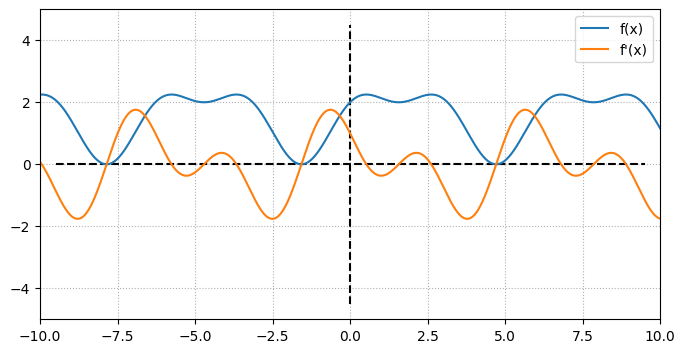

In [4]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(8,8))
ax.set_aspect('equal')
ax.grid(linestyle="dotted")

# plotting graph settings:
xb = [-10, 10] # represents x axis bound
yb = [-5, 5] # represents y axis bound
ag = 0.5       # gap of axis line from border of graph

# define limits and make axis line:
plt.ylim(yb)
plt.xlim(xb)
plt.plot([ xb[0] + ag, xb[1] - ag ],[0,0], linestyle='--', color='k')
plt.plot([0,0], [yb[0] + ag, yb[1] - ag], linestyle='--', color='k')

#plot function f
x = np.linspace(-10, 10, 100000)
y = f(x)
ax.plot(x,y, label="f(x)")

#plot function fprime
y2 = fprime(x)
ax.plot(x,y2, label="f'(x)")


plt.legend()
plt.show()

Step 2: Make Inital Guess according to plots. <br>
Step 3: Try newton() function with various initial guess.

#### Reference:
```scipy.optimize.newton(f, initial_guess, fprime="None") ``` <br> function documentation: <br>
https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.newton.html

In [5]:
import scipy.optimize as opt

In [7]:
#secant method:
opt.newton(f, 5)

4.712389000075041

In [10]:
#newton method:
opt.newton(f, 5, fprime)

4.712388988619138

#### Sytem of Linear Algebric equations: [ch3: Numerical Methods]
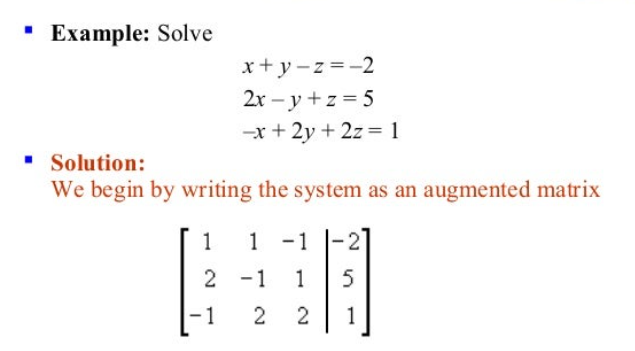

Reference: <br>
Function: ``` scipy.linalg.inv(A).dot(Y)  ``` <br>
Scipy Linear Algebra (scipy.linalg)  documentation:<br>
https://docs.scipy.org/doc/scipy/reference/linalg.html

In [13]:
import scipy.linalg as alg
A = [[1, 1, -1],
     [2, -1, 1],
     [-1, 2, 2]]
Y = [-2, 5, 1]

# Equation of simultaneous problem:
# A X = Y
# X = A^-1 . Y

res = alg.inv(A).dot(Y)
for i in res:
    display(round(i,3))

1.0

-1.0

2.0

---

Find eigen value and eigen vector of matrix A given below: <br>
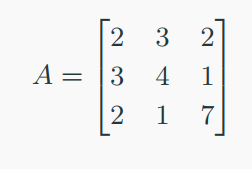


Reference: <br>
Function: ``` scipy.linalg.eig(A)``` <br>
https://docs.scipy.org/doc/scipy/reference/generated/scipy.linalg.eig.html

In [ ]:
A = [[2,3,2],
     [3,4,1],
     [2,1,7]]


In [14]:
alg.eig(A)

(array([-2.44948974+0.j,  2.        +0.j,  2.44948974+0.j]),
 array([[ 0.3663842 , -0.81649658, -0.62616165],
        [-0.81511137, -0.40824829, -0.14072662],
        [ 0.44872717,  0.40824829,  0.76688827]]))

#### Curve Fitting: (Ch4: Numerical Methods)


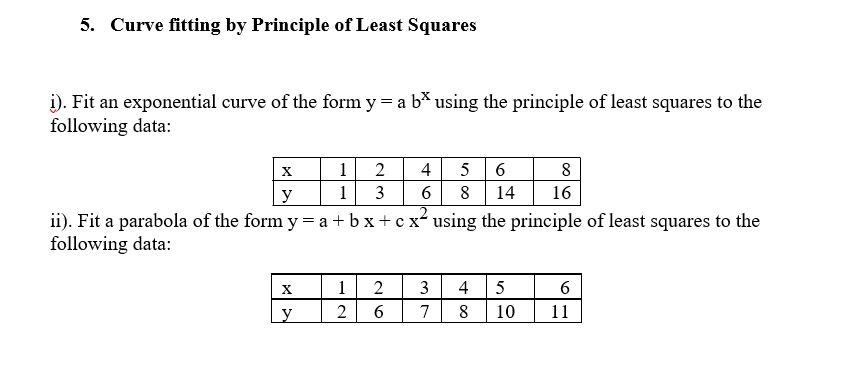


(i) we will be fitting it for y = a + bx

---

References:<br>
Function: ``` numpy.polyfit(x,y,deg)``` <br>
https://numpy.org/doc/stable/reference/generated/numpy.polyfit.html
<br>
Fit a polynomial ``` p(x) = p[0] * x**deg + ... + p[deg] ``` of degree deg to points ```(x, y)```. <br>

Returns a vector of coefficients p that minimises the squared error in the order ```deg, deg-1, … 0```.



In [17]:
import numpy as np

In [18]:
x = np.array([1,2,4,5,6,8])
y = np.array([1,3,6,8,14,16])

In [22]:
b, a = np.polyfit(x,y,1)
print(f"y={round(b,3)}x + {round(a,3)}")


y=2.25x + -1.75


---

y = a + bx + c x^2

In [36]:
x = np.array([1,2,3,4,5,6])
y = np.array([2,6,7,8,10,11])

In [37]:
c,b,a = np.polyfit(x,y,2)
print(f"y={round(c,3)}x^2 + {round(b,3)}x + {round(a,3)}")

y=-0.196x^2 + 3.032x + -0.3


Let's Visualize the fitting functions as well as provided data:


Text(0.5, 1.0, 'Curve Fitting')

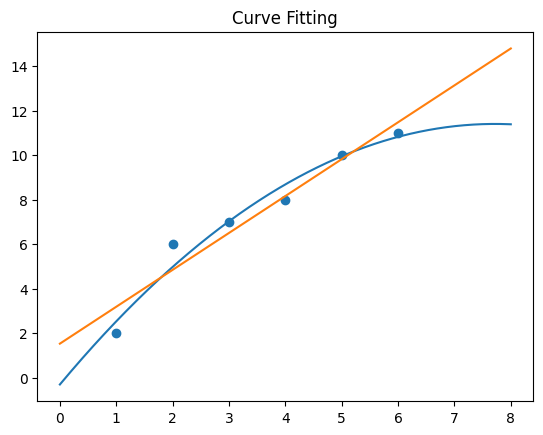

In [38]:
import matplotlib.pyplot as plt

#points
plt.scatter(x,y)
# plt.grid()

#quad fit
m = np.linspace(0,8,1000)
n = c * m**2 + b * m + a
plt.plot(m,n)

#linear fit
b, a = np.polyfit(x,y,1)
n = b*m + a
plt.plot(m,n)

plt.title("Curve Fitting")

#### Interpolation: (Ch4: Numerical Methods)

Reference:<br>
Function: ```f = scipy.interpolate.interp1d(x, y, kind='linear') ``` <br>
https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.interp1d.html#scipy.interpolate.interp1d

In [39]:
x = np.array([1,2,3,4,5,6])
y = np.array([2,6,7,8,10,11])

In [49]:
import matplotlib.pyplot as plt
import scipy.interpolate as pol

fs = pol.interp1d(x,y, kind='linear')

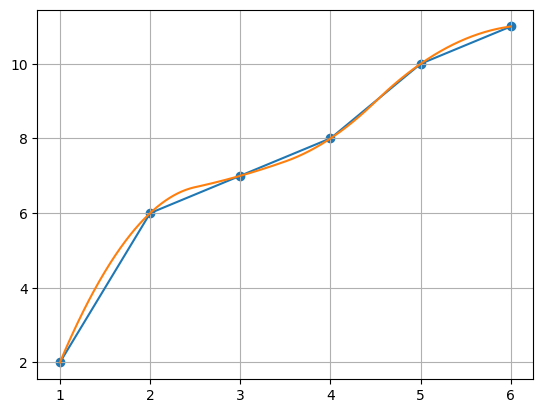

In [53]:
plt.scatter(x,y)
plt.grid()

m = np.linspace(1,6,1000)
n = fs(m)
plt.plot(m,n)

fs2 = pol.interp1d(x,y, kind='quadratic')
plt.plot(m, fs2(m) )


#### Differentiation and Integration: (Ch5: Numerical Methods)
Reference1: <br>
Function: ```scipy.misc.derivative(func, x0, dx=1.0, n=1) ``` <br>

https://docs.scipy.org/doc/scipy/reference/generated/scipy.misc.derivative.html#scipy-misc-derivative


Reference2: <br>
Function: ```scipy.integrate.quad(func, a, b) ``` <br>

https://docs.scipy.org/doc/scipy/reference/generated/scipy.misc.derivative.html#scipy-misc-derivative


In [55]:

def f(x):
    return np.sin(x) + np.cos(x)**2 + 1 


In [56]:
# New way of importing required functions only from huge package:
from scipy.misc import derivative
from scipy.integrate import quad



In [62]:
# help(quad)

In [60]:
print("derivative=", derivative(f, 5, dx = 0.0001))
print("integration=", quad(f, 1, 4))


derivative= 0.8276832922510247
integration= (5.713961131681176, 6.343771210205658e-14)


C:\Users\Nelson\AppData\Local\Temp\ipykernel_11736\1898600985.py:1: DeprecationWarning: scipy.misc.derivative is deprecated in SciPy v1.10.0; and will be completely removed in SciPy v1.12.0. You may consider using findiff: https://github.com/maroba/findiff or numdifftools: https://github.com/pbrod/numdifftools
  print("derivative=", derivative(f, 5, dx = 0.0001))


In [76]:
# compare with analytical:
import sympy as sp
x = sp.symbols('x')
a,b = sp.symbols('a, b', constant=True)
f = sp.sin(x) + sp.cos(x)**2 +1

display(f)
# display(sp.Derivative(f,x))
# display(sp.Derivative(f,x).doit())
# display(sp.Derivative(f,x).doit().subs(x,5))
# display(sp.Derivative(f,x).doit().subs(x,5).n())

display("Derivative:", sp.Derivative(f,x).doit().subs(x,5).n())
display("integration:", sp.Integral(f,(x,a,b)).doit().subs([(a, 1), (b,4)] ).n() )

sin(x) + cos(x)**2 + 1

'Derivative:'

0.827683296352596

'integration:'

5.71396113168118

---

#### Solution of ODE: ( Ch6: Numerical Methods)

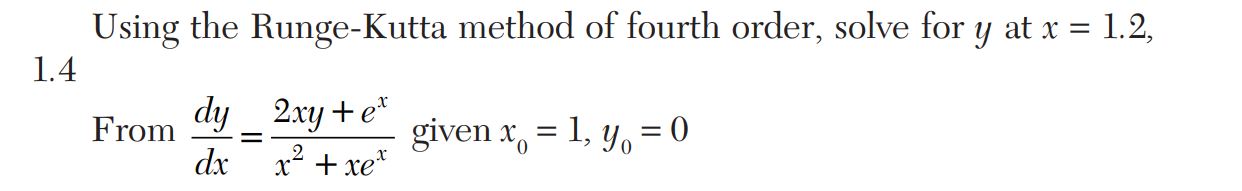


Reference1: <br>
```scipy.integrate.ode(f)``` <br>
Solve an equation system $ y^{\prime}(t) = f(t,y)$.


In [83]:
import numpy as np
from scipy.integrate import ode


In [84]:
def f(x,y):
    return (2*x*y + np.exp(x) )/( x**2 + x* np.exp(x) )

In [85]:
r = ode(f)

We use ```set_initial_value(y, t)``` method to define initial conditions.

In [86]:
r.set_initial_value(0, 1)


We use ```set_integrator(methodname)``` method to define method of solving ODE.

In [87]:
r.set_integrator("dopri5")

Solve diff eqn using following function:<br>
``` integrate(t2)```

In [88]:
r.integrate(1.2)

array([0.14021079])

In [89]:
r.integrate(1.4)

array([0.27049797])

---